In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")

import spacy

 
    
from wordcloud import WordCloud
from collections import Counter
import string

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:


df=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.rename(columns={'v1':'target','v2':'message'},inplace=True)

In [7]:
df.isnull().sum()

target     0
message    0
dtype: int64

In [8]:
df.duplicated().sum()

403

In [9]:
df.drop_duplicates(inplace=True)

In [33]:
df['message']=df['message'].str.lower()

In [10]:
df

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Encoding

In [11]:
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [12]:
df

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## EDA

<Axes: >

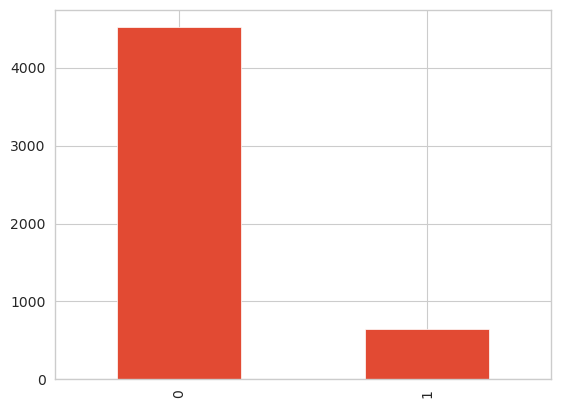

In [13]:
df['target'].value_counts().plot(kind='bar')

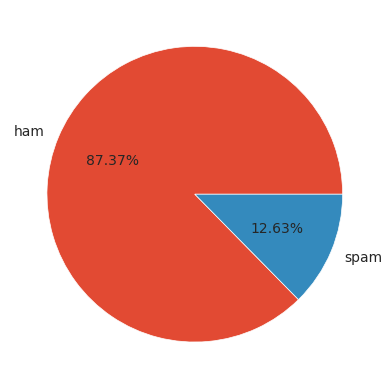

In [14]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%')
plt.show()

## Feature Engineering

In [15]:
# number of characters in messages
df['characters']=df['message'].apply(len)
# number of words in messages
df['words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
# number of sentences in messages
df['sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [16]:
df

,target,message,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [17]:
df[["characters","words","sentences"]].describe()

,characters,words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [18]:
df[df['target']==0][["characters","words","sentences"]].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [19]:
df[df['target']==1][["characters","words","sentences"]].describe()

,characters,words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


<Axes: xlabel='characters', ylabel='Count'>

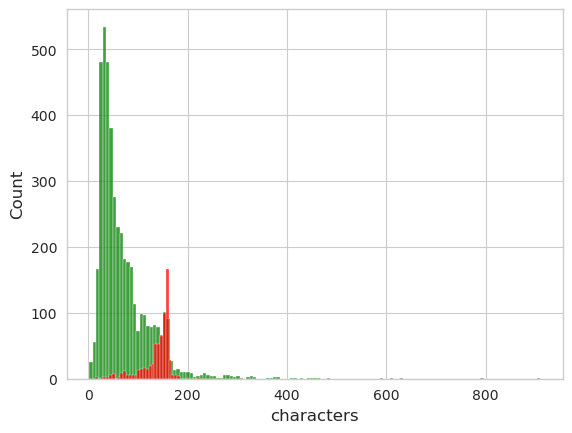

In [20]:
sns.histplot(df[df['target']==0]['characters'],color='green')
sns.histplot(df[df['target']==1]['characters'],color='red')


<Axes: xlabel='sentences', ylabel='Count'>

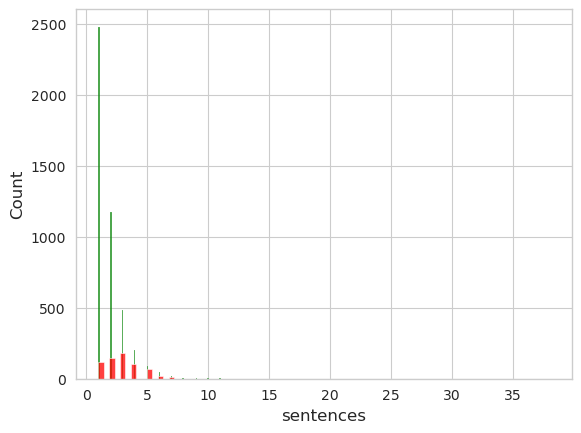

In [21]:
sns.histplot(df[df['target']==0]['sentences'],color='green')
sns.histplot(df[df['target']==1]['sentences'],color='red')


<Axes: xlabel='words', ylabel='Count'>

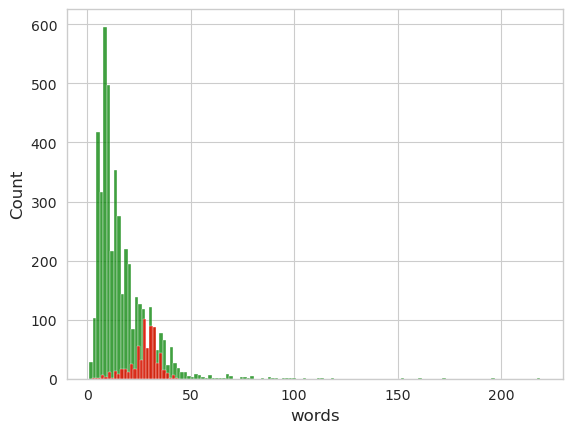

In [22]:
sns.histplot(df[df['target']==0]['words'],color='green')
sns.histplot(df[df['target']==1]['words'],color='red')


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


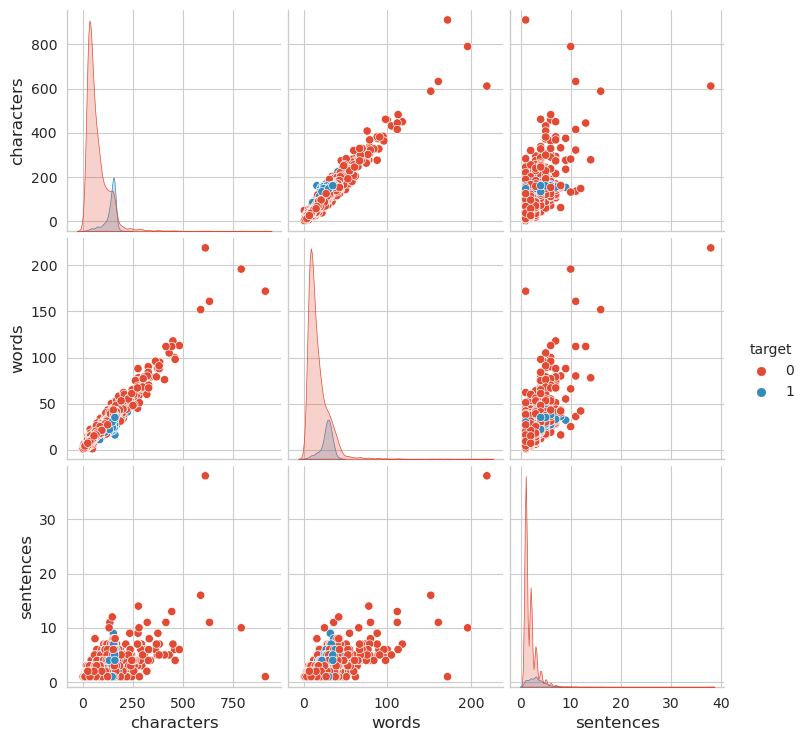

In [23]:
sns.pairplot(df,hue='target')

<Axes: >

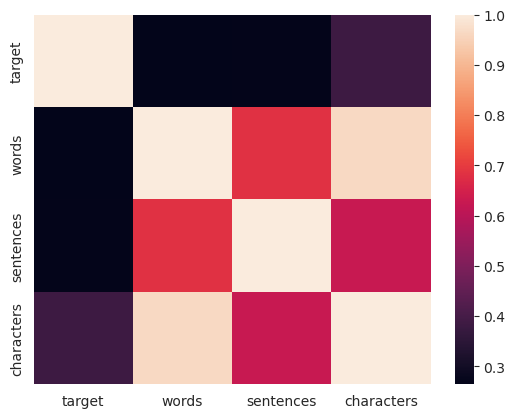

In [24]:
sns.heatmap(df[['target','words','sentences','characters']].corr())

## Preprocessing

In [66]:
!pip install nltk==3.2.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.6 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.2.4-py3-none-any.whl size=1367719 sha256=34803da4b7aa39892d685dc0b6a8140d575b7f1c70150c0ef5b3bc90f4584b60
  Stored in directory: /root/.cache/pip/wheels/0e/8c/42/bcd0934b61ecf4cef964ccc9881888cca0841ec72266e99de1
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [105]:
nlp = spacy.load('en_core_web_sm')

def lemmatize(word):
    doc=nlp(word)
    for token in doc:
        return token.lemma_
    



In [106]:


def preprocess(text):
    import string
    
   
    text=text.lower()
    text=nltk.word_tokenize(text)
    text=[lemmatize(word) for word in text if word not in nltk.corpus.stopwords.words('english')]
    text=[word for word in text if word not in string.punctuation]
    text=[word for word in text if word.isalnum()]
    text=' '.join(text)
    return text

In [107]:
df['transformed']=df['message'].apply(preprocess)
df

,target,message,characters,words,sentences,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah not think go usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time try 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,ì b go esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,pity mood suggestion
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like would interested buy someth...


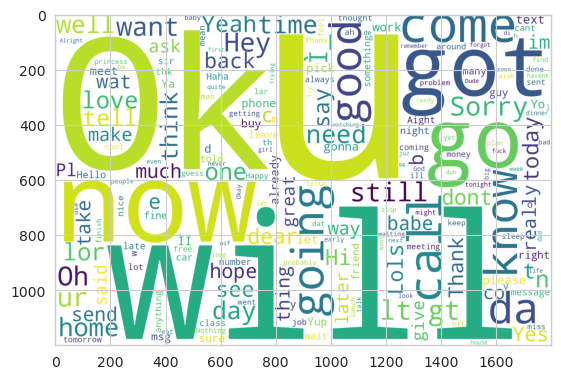

In [29]:
wordcloud=WordCloud(width=1800,height=1200,background_color='white',min_font_size=10)
plt.imshow(wordcloud.generate(df[df['target']==0]['message'].to_string()))

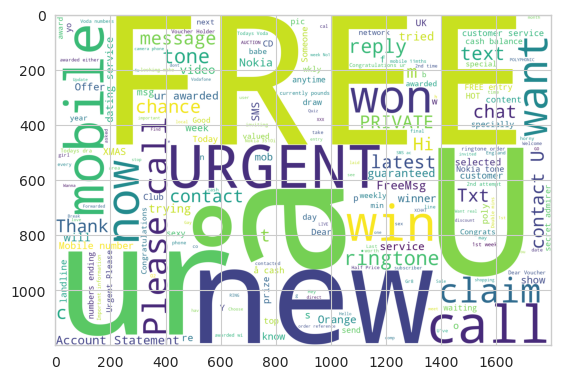

In [30]:
wordcloud=WordCloud(width=1800,height=1200,background_color='white',min_font_size=10)
plt.imshow(wordcloud.generate(df[df['target']==1]['message'].to_string()))

<Axes: xlabel='0'>

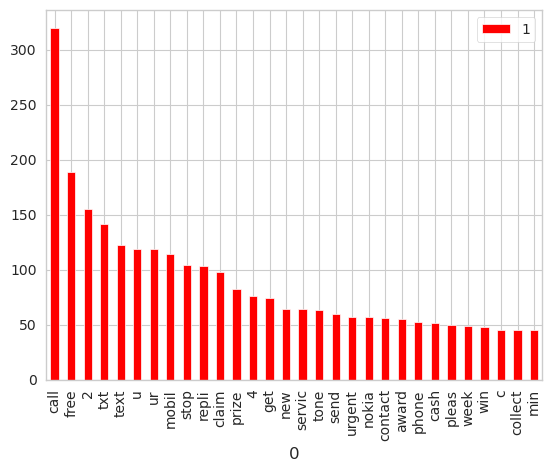

In [37]:
spam_words=[]
for i in df[df['target']==1]['transformed'].to_list():
    for word in i.split():
        spam_words.append(word)
pd.DataFrame(Counter(spam_words).most_common(30)).plot(kind='bar',x=0,y=1,color='red')

<Axes: xlabel='0'>

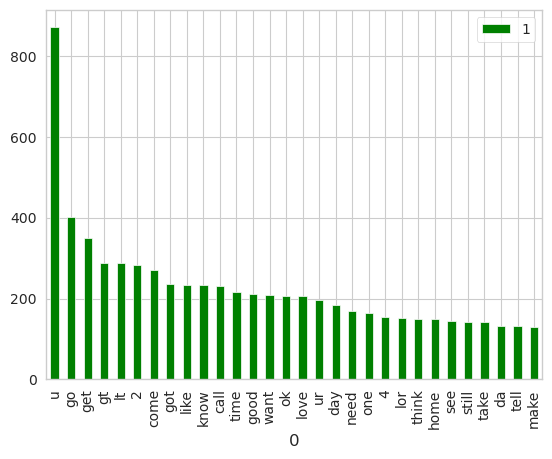

In [39]:
ham_words=[]
for i in df[df['target']==0]['transformed'].to_list():
    for word in i.split():
        ham_words.append(word)
pd.DataFrame(Counter(ham_words).most_common(30)).plot(kind='bar',x=0,y=1,color='green')

In [55]:
df.to_csv('spam1.csv',index=False)

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=CountVectorizer()
#tfidf=TfidfVectorizer(encoding="latin-1",decode_error="ignore")
X=cv.fit_transform(df['transformed']).toarray()
#df['transformed'].fillna(" ", inplace=True)
X=cv.fit_transform(df['transformed']).toarray()
y=df['target'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


In [109]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB() 
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
from sklearn.svm import SVC
svc=SVC()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score


In [110]:
models=[mnb,gnb,bnb,rfc,svc,lr,dtc,knn,abc,gbc,etc]
model_names=['MultinomialNB','GaussianNB','BernoulliNB','RandomForestClassifier','SVC','LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier','AdaBoostClassifier','GradientBoostingClassifier','ExtraTreesClassifier']
accuracy=[]
for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))
    print('Model name:  {}   Accuracy:  {}'.format(model_names[model],round(accuracy_score(y_test,y_pred),2)))
    print('Model name:  {}   Precision:  {}'.format(model_names[model],round(precision_score(y_test,y_pred),2)))
    

Model name:  MultinomialNB   Accuracy:  0.96
Model name:  MultinomialNB   Precision:  0.83
Model name:  GaussianNB   Accuracy:  0.87
Model name:  GaussianNB   Precision:  0.5
Model name:  BernoulliNB   Accuracy:  0.97
Model name:  BernoulliNB   Precision:  0.98
Model name:  RandomForestClassifier   Accuracy:  0.97
Model name:  RandomForestClassifier   Precision:  1.0
Model name:  SVC   Accuracy:  0.97
Model name:  SVC   Precision:  0.99
Model name:  LogisticRegression   Accuracy:  0.98
Model name:  LogisticRegression   Precision:  0.99
Model name:  DecisionTreeClassifier   Accuracy:  0.97
Model name:  DecisionTreeClassifier   Precision:  0.92
Model name:  KNeighborsClassifier   Accuracy:  0.9
Model name:  KNeighborsClassifier   Precision:  1.0
Model name:  AdaBoostClassifier   Accuracy:  0.96
Model name:  AdaBoostClassifier   Precision:  0.95
Model name:  GradientBoostingClassifier   Accuracy:  0.97
Model name:  GradientBoostingClassifier   Precision:  0.99
Model name:  ExtraTreesClass

Model name:MultinomialNB Accuracy:0.9787234042553191
Model name:MultinomialNB Precision:0.9007633587786259
Model name:GaussianNB Accuracy:0.8636363636363636
Model name:GaussianNB Precision:0.46956521739130436
Model name:BernoulliNB Accuracy:0.9748549323017408
Model name:BernoulliNB Precision:0.9809523809523809
Model name:RandomForestClassifier Accuracy:0.9700193423597679
Model name:RandomForestClassifier Precision:1.0
Model name:SVC Accuracy:0.971953578336557
Model name:SVC Precision:1.0
Model name:LogisticRegression Accuracy:0.9825918762088974
Model name:LogisticRegression Precision:1.0
Model name:DecisionTreeClassifier Accuracy:0.9613152804642167
Model name:DecisionTreeClassifier Precision:0.8990825688073395
Model name:KNeighborsClassifier Accuracy:0.9129593810444874
Model name:KNeighborsClassifier Precision:1.0
Model name:AdaBoostClassifier Accuracy:0.9661508704061895
Model name:AdaBoostClassifier Precision:0.9339622641509434
Model name:GradientBoostingClassifier Accuracy:0.9632495164410058
Model name:GradientBoostingClassifier Precision:0.978494623655914
Model name:ExtraTreesClassifier Accuracy:0.9758220502901354
Model name:ExtraTreesClassifier Precision:0.9903846153846154

In [59]:
import pickle
pickle.dump(lr,open('lr.pkl','wb'))
pickle.dump(svc,open('svc.pkl','wb'))
pickle.dump(rfc,open('rfc.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))